# Inflation Predictions by the Norwegian National Bank.

Author: Camilla Nore

Date: 2015-08-15

The objective of this project is to calculate and present the prediction
error in the CPI and CPI_JAE estimates.

** Completed tasks **
1. Reformat the input data
2. Find prediction error as a function of prediction horizon

** Remaining work **
3. Evaluate statistics on the prediction error.
4. Analyze the output data.

## Project structure

- *data*: The source dataset, and converted csv files.
- *tests*: Tests of functions, run with nosetest.
- *inflastudy*: A package with helper functions and objects to work with the predictions and datasets.

## All CPI Predictions

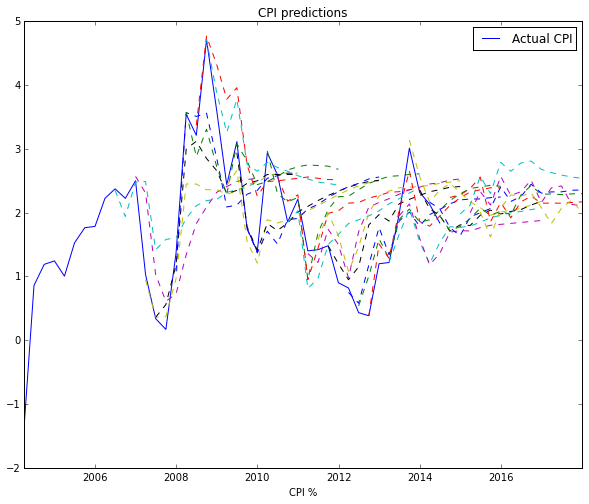

In [10]:
plot_all_CPI()

## CPI predictions one quarter ahead

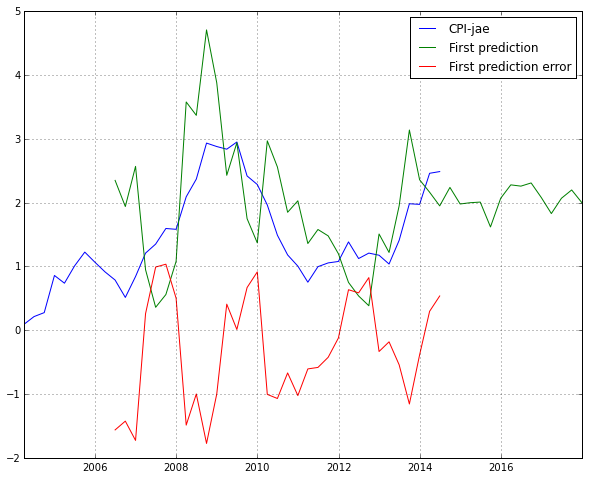

In [14]:
find_and_plot_CPI_next_quarter()

In [1]:
""" Inflation Prediction Study
Author: Camilla Nore
Date:   2015-08-30
"""
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# NB: As this is iPython, the module will be cached. If you change 
#     the module, you have to restart the iPython kernel.
from inflastudy import InflaData  # Custom module for this study.

In [2]:
""" Load the data file """
data = InflaData.InflaData(filename='data/kongepanel_upd_ark_A.csv')

In [9]:
def plot_all_CPI():
    """ Plot all CPI predictions and the actual CPI. """
    plt.figure('CPI predictions', figsize=(10,8))  # Larger plot.
    plt.title('CPI predictions')
    plt.xlabel('Year')
    plt.xlabel('CPI %')
    # Plot the actual CPI as a solid line.
    plt.plot(data.raw_data.index,
             data.raw_data['CPI'],
             label ='CPI')
    plt.legend(('Actual CPI', 'Predictions'))

    for col_name in data.cpi_predictions:
        plt.plot(data.cpi_predictions.index,
                 data.cpi_predictions[col_name],
                 '--',
                 label = 'col_name')

In [13]:
def find_and_plot_CPI_next_quarter():
    # Find the vector of predictions one quarter ahead

    for t in data.cpi_predictions.index:
        for col_name in data.cpi_predictions.columns:
            value = data.cpi_predictions.loc[t,col_name]
            if not math.isnan(value):
                data.raw_data.loc[t,'firstpred'] = value
                data.raw_data.loc[t,'firstpred_src'] = col_name
                # Do not stop the loop on the first column, but rather
                # use the last column with a valid number.
                # Have to think a bit on how to get the other predictions
                # with longer horizons, should probably make a list of these.
                # An option is to work on the reverse list of columns, and add 
                # with longer prediction horizons..

    plt.figure('First prediction',figsize=(10,8))
    plt.plot(data.raw_data.index,
             data.raw_data['CPI-jae'],
             label='CPI-jae')
    plt.plot(data.raw_data.index,
             data.raw_data.firstpred,
             label='First prediction')
    plt.plot(data.raw_data.index,
             data.raw_data['CPI-jae']-data.raw_data.firstpred,
             label='First prediction error')
    plt.legend()
    plt.grid(True)
    # Print the plotted data, so it can be verified towards
    # the excel source data.
    # print data.raw_data.loc[:,['firstpred','firstpred_src']]

    # Regn ut square errors på den lista her.
